In [12]:
import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

In [13]:
data = pd.read_csv('../Data/clean_data_outliers.csv')
data.head()

,brand_model,brand,model,mileage,fuel,gear,offer_type,price,hp,year,age
0,Volkswagen Golf,Volkswagen,Golf,92800,Gasoline,Manual,Used,6877,122.0,2011,12
1,Renault Megane,Renault,Megane,96200,Gasoline,Manual,Used,6950,110.0,2011,12
2,Peugeot 308,Peugeot,308,156000,Gasoline,Manual,Used,6950,156.0,2011,12
3,Toyota Auris,Toyota,Auris,147000,Electric,Automatic,Used,6950,99.0,2011,12
4,Renault Scenic,Renault,Scenic,91894,Diesel,Manual,Used,6970,131.0,2011,12


In [14]:
data=data.drop('brand_model', axis=1)

In [15]:
data.shape

(27353, 10)

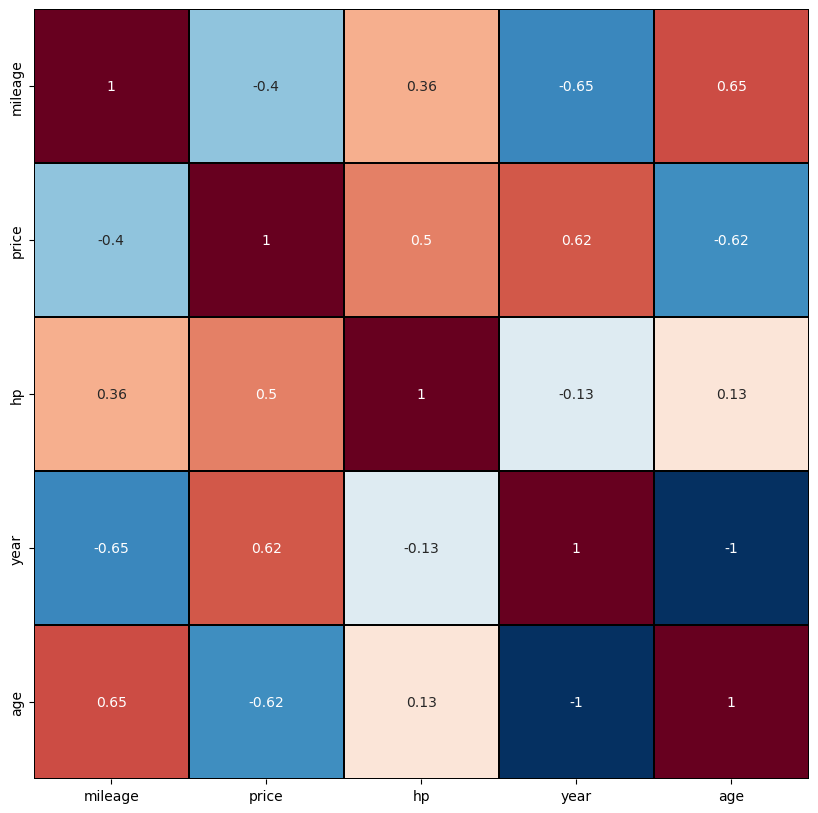

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cbar=False, vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='RdBu_r')
plt.show()

### Processing Data

In [17]:
# X-y split
X=data.drop('price', axis=1)
y=data.price

In [18]:
#train-test split
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2)

In [19]:
# first numerical and categorical split

X_train_num=X_train._get_numeric_data()
X_train_cat=X_train.select_dtypes('object')
X_test_num=X_test._get_numeric_data()
X_test_cat=X_test.select_dtypes('object')

In [20]:
#Scaling numerical datafrom sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_num)

X_train_scaled_np = scaler.transform(X_train_num)
X_test_scaled_np  = scaler.transform(X_test_num)

X_train_num_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train_num.columns)
X_test_num_scaled_df  = pd.DataFrame(X_test_scaled_np, columns=X_test_num.columns)

In [21]:
#Storing Scaler
with open("../Scalers/standard_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file, pickle.HIGHEST_PROTOCOL)

In [22]:
# Transforming categorical data - OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)

X_train_cat = encoder.transform(X_train_cat).toarray()
X_test_cat = encoder.transform(X_test_cat).toarray()

X_train_cat = pd.DataFrame(X_train_cat, columns = encoder.get_feature_names_out())
X_test_cat = pd.DataFrame(X_test_cat, columns = encoder.get_feature_names_out())

In [23]:
with open("../Transformers/one_hot_encoder.pkl", "wb") as file:
       pickle.dump(encoder, file, pickle.HIGHEST_PROTOCOL)

In [24]:
# joining numerical-categorical
X_train_f=pd.concat([X_train_num_scaled_df, X_train_cat], axis=1)
X_test_f=pd.concat([X_test_num_scaled_df, X_test_cat], axis=1)

## Modelling

### Linear Regression

In [25]:
#Apply linear regression
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train_f, y_train)   # model train
y_test_pred_linreg=linreg.predict(X_test_f)   # model prediction
y_train_pred_linreg=linreg.predict(X_train_f)   # model prediction

In [26]:
from sklearn.metrics import mean_squared_error as mse

print ('Decision Tree Regression: train R2: {} -- test R2: {}'.format(linreg.score(X_train_f, y_train),
                                            linreg.score(X_test_f, y_test)))


train_mse=mse(linreg.predict(X_train_f), y_train)
test_mse=mse(linreg.predict(X_test_f), y_test)

print ('Decision Tree Regression:train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

Decision Tree Regression: train R2: 0.8877403010051356 -- test R2: 0.8917583789971371
Decision Tree Regression:train RMSE: 1526.8425308680312 -- test RMSE: 1481.8248851870367


In [27]:
#stoing linear
with open("../Models/Linear.pkl", "wb") as file:
       pickle.dump(linreg, file, pickle.HIGHEST_PROTOCOL)

### Decision Tree Regression

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dec_model=DecisionTreeRegressor()
dec_model.fit(X_train_f, y_train)
y_test_pred_dec_model=dec_model.predict(X_test_f)   # model prediction
y_train_pred_dec_model=dec_model.predict(X_train_f)   # model prediction

In [30]:
from sklearn.metrics import mean_squared_error as mse

print ('Decision Tree Regression: train R2: {} -- test R2: {}'.format(dec_model.score(X_train_f, y_train),
                                            dec_model.score(X_test_f, y_test)))


train_mse=mse(dec_model.predict(X_train_f), y_train)
test_mse=mse(dec_model.predict(X_test_f), y_test)

print ('Decision Tree Regression:train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

Decision Tree Regression: train R2: 0.9983107092116118 -- test R2: 0.8489613679782714
Decision Tree Regression:train RMSE: 187.29859481706865 -- test RMSE: 1750.4260256214955


In [31]:
#stoing Decision Tree
with open("../Models/Decision_Tree.pkl", "wb") as file:
       pickle.dump(linreg, file, pickle.HIGHEST_PROTOCOL)

### Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
random_model=RandomForestRegressor()
random_model.fit(X_train_f, y_train)   # model train
y_test_pred_random_model=random_model.predict(X_test_f)   # model prediction
y_train_pred_random_model=random_model.predict(X_train_f)   # model prediction

In [34]:
from sklearn.metrics import mean_squared_error as mse

print ('Decision Tree Regression: train R2: {} -- test R2: {}'.format(random_model.score(X_train_f, y_train),
                                            random_model.score(X_test_f, y_test)))


train_mse=mse(random_model.predict(X_train_f), y_train)
test_mse=mse(random_model.predict(X_test_f), y_test)

print ('Random Forest Regression:train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

Decision Tree Regression: train R2: 0.9855669211735001 -- test R2: 0.9092655510356058
Random Forest Regression:train RMSE: 547.4718632584724 -- test RMSE: 1356.7063045402476


In [35]:
#stoing Decision Tree
with open("../Models/Random_Forest.pkl", "wb") as file:
       pickle.dump(linreg, file, pickle.HIGHEST_PROTOCOL)

### XGBoost Regression

In [36]:
import xgboost
from xgboost import XGBRegressor

In [37]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_f, y_train)
y_test_pred_random_model=xgb_model.predict(X_test_f)   # model prediction
y_train_pred_random_model=xgb_model.predict(X_train_f)   # model prediction

In [38]:
from sklearn.metrics import mean_squared_error as mse

print ('Decision Tree Regression: train R2: {} -- test R2: {}'.format(xgb_model.score(X_train_f, y_train),
                                            xgb_model.score(X_test_f, y_test)))

train_mse=mse(xgb_model.predict(X_train_f), y_train)
test_mse=mse(xgb_model.predict(X_test_f), y_test)

print ('Decision Tree Regression:train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

Decision Tree Regression: train R2: 0.9422372701328093 -- test R2: 0.9206597238704978
Decision Tree Regression:train RMSE: 1095.2321078842576 -- test RMSE: 1268.6639344333817


In [39]:
#stoing Decision Tree
with open("../Models/XGBoost.pkl", "wb") as file:
       pickle.dump(linreg, file, pickle.HIGHEST_PROTOCOL)

## Best Model - XGBoost Regression

### Feature Importance

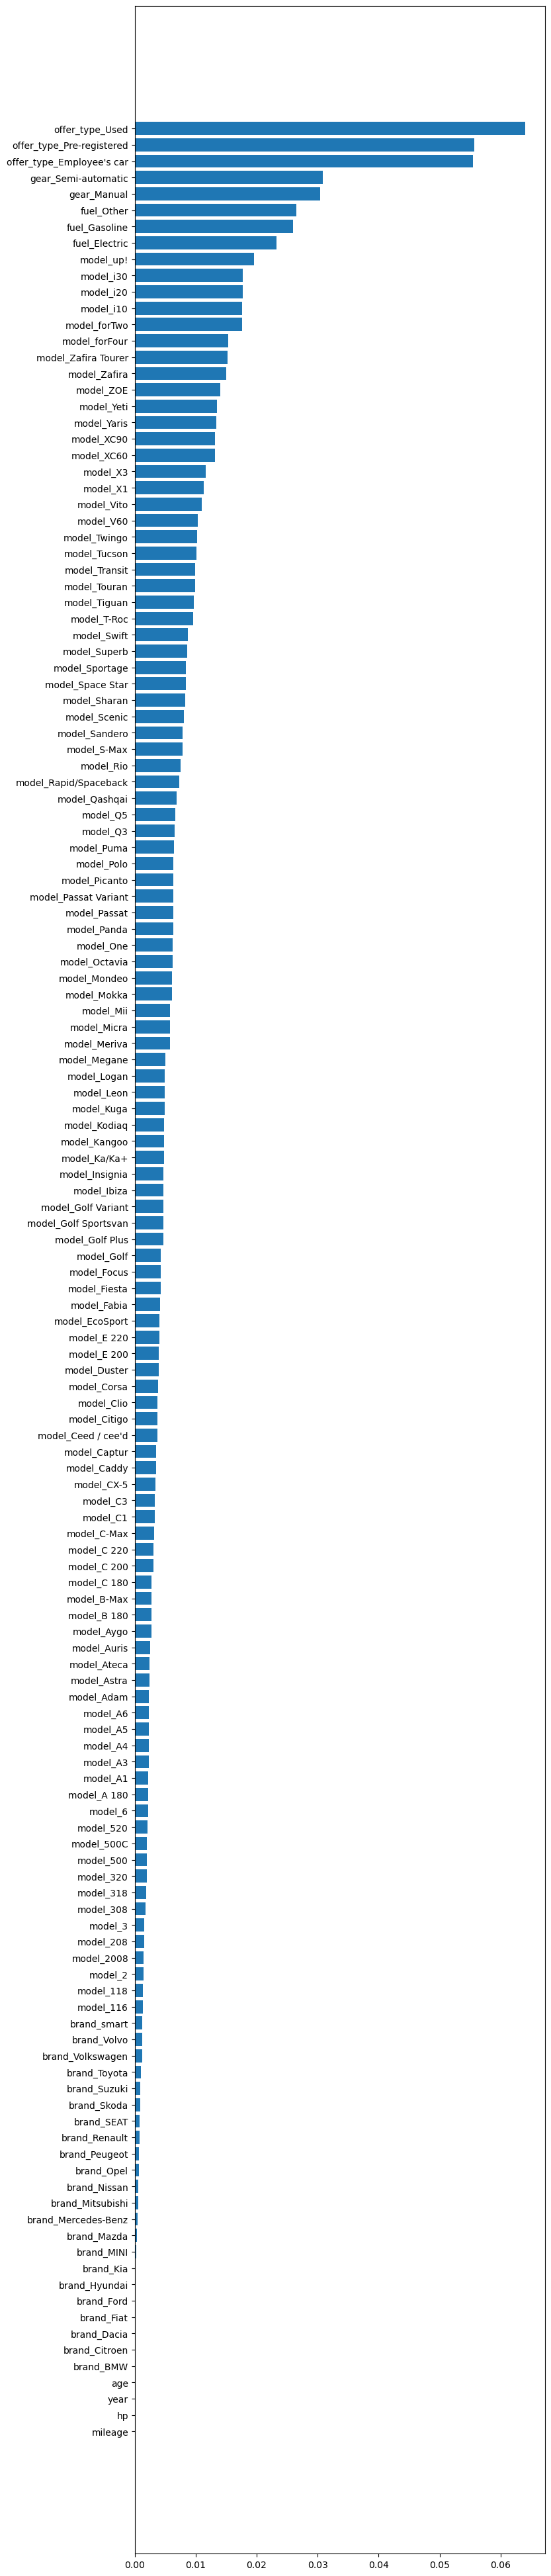

In [40]:
plt.figure(figsize=(8,50))
model=XGBRegressor()
model.fit(X_train_f, y_train)
importance=np.sort(model.feature_importances_)
plt.barh(X_train_f.columns,importance)
plt.show()

### Checking how the best model predict the price

In [41]:
Y_train_predicted=xgb_model.predict(X_train_f)
Y_test_predicted=xgb_model.predict(X_test_f)

In [42]:
Result=pd.DataFrame({"Actual":y_test,"Predicted":Y_test_predicted})
Result.head(20)

,Actual,Predicted
11440,9850,10311.291992
25005,8990,8168.162598
3605,11490,11828.109375
18211,4590,5165.468262
21831,5999,6223.441895
20343,7590,9819.324219
3355,8840,7688.892090
23572,7490,7522.789551
7247,9290,9598.017578
26143,10680,11887.648438


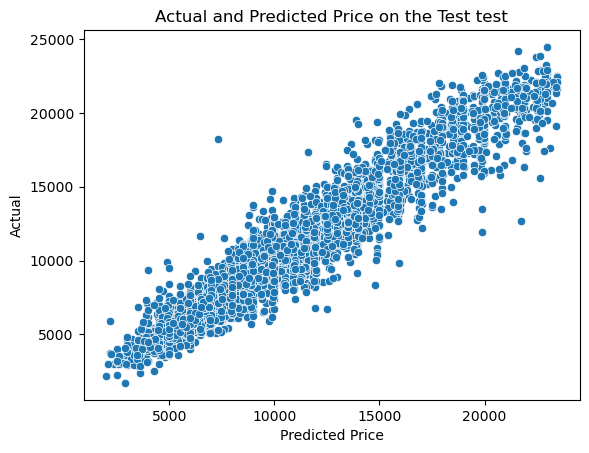

In [43]:
sns.scatterplot(x=Result['Actual'], y=Result['Predicted'])
plt.title("Actual and Predicted Price on the Test test")
plt.ylabel("Actual")
plt.xlabel("Predicted Price")
plt.show()

In [44]:
sns.regplot(Result['Actual'], Result['Predicted'], scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 
plt.title("Actual and Predicted Price on the Test test")
plt.ylabel("Actual")
plt.xlabel("Predicted Price")
plt.show()

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given